<a href="https://colab.research.google.com/github/Wondupper/DecisionTrees_Phones/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D1%82%D0%B5%D0%BB%D0%B5%D1%84%D0%BE%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

#Деревья

2) Изучите полученный набор данных.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


3) Преобразуйте набор данных, подготовив его к применению классификации с помощью дерева решений:

3.1) выполните минимальные необходимые манипуляции, а также

In [ ]:
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
data_train.duplicated().sum()

0

In [ ]:
data_test.duplicated().sum()

0

3.2) отделите столбец с меткой price_range и

In [ ]:
price_range = data_train['price_range'].squeeze()
data_train = data_train.drop(['price_range'], axis = 1)

3.3) разбейте данные на тренировочный и тестовый наборы.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, price_range, test_size = 0.3, random_state = 42)

4) Обучите классификатор DecisionTreeClassifier на тренировочном наборе.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8216666666666667

5) Используйте обученную модель на тестовых данных, оцените полученные результаты с помощью нескольких метрик.

In [ ]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       354
           2       1.00      1.00      1.00       352
           3       1.00      1.00      1.00       345

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



In [ ]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.76      0.80      0.78       146
           2       0.75      0.74      0.74       148
           3       0.87      0.86      0.86       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



6) Визуализируйте и интерпретируйте обученную модель.

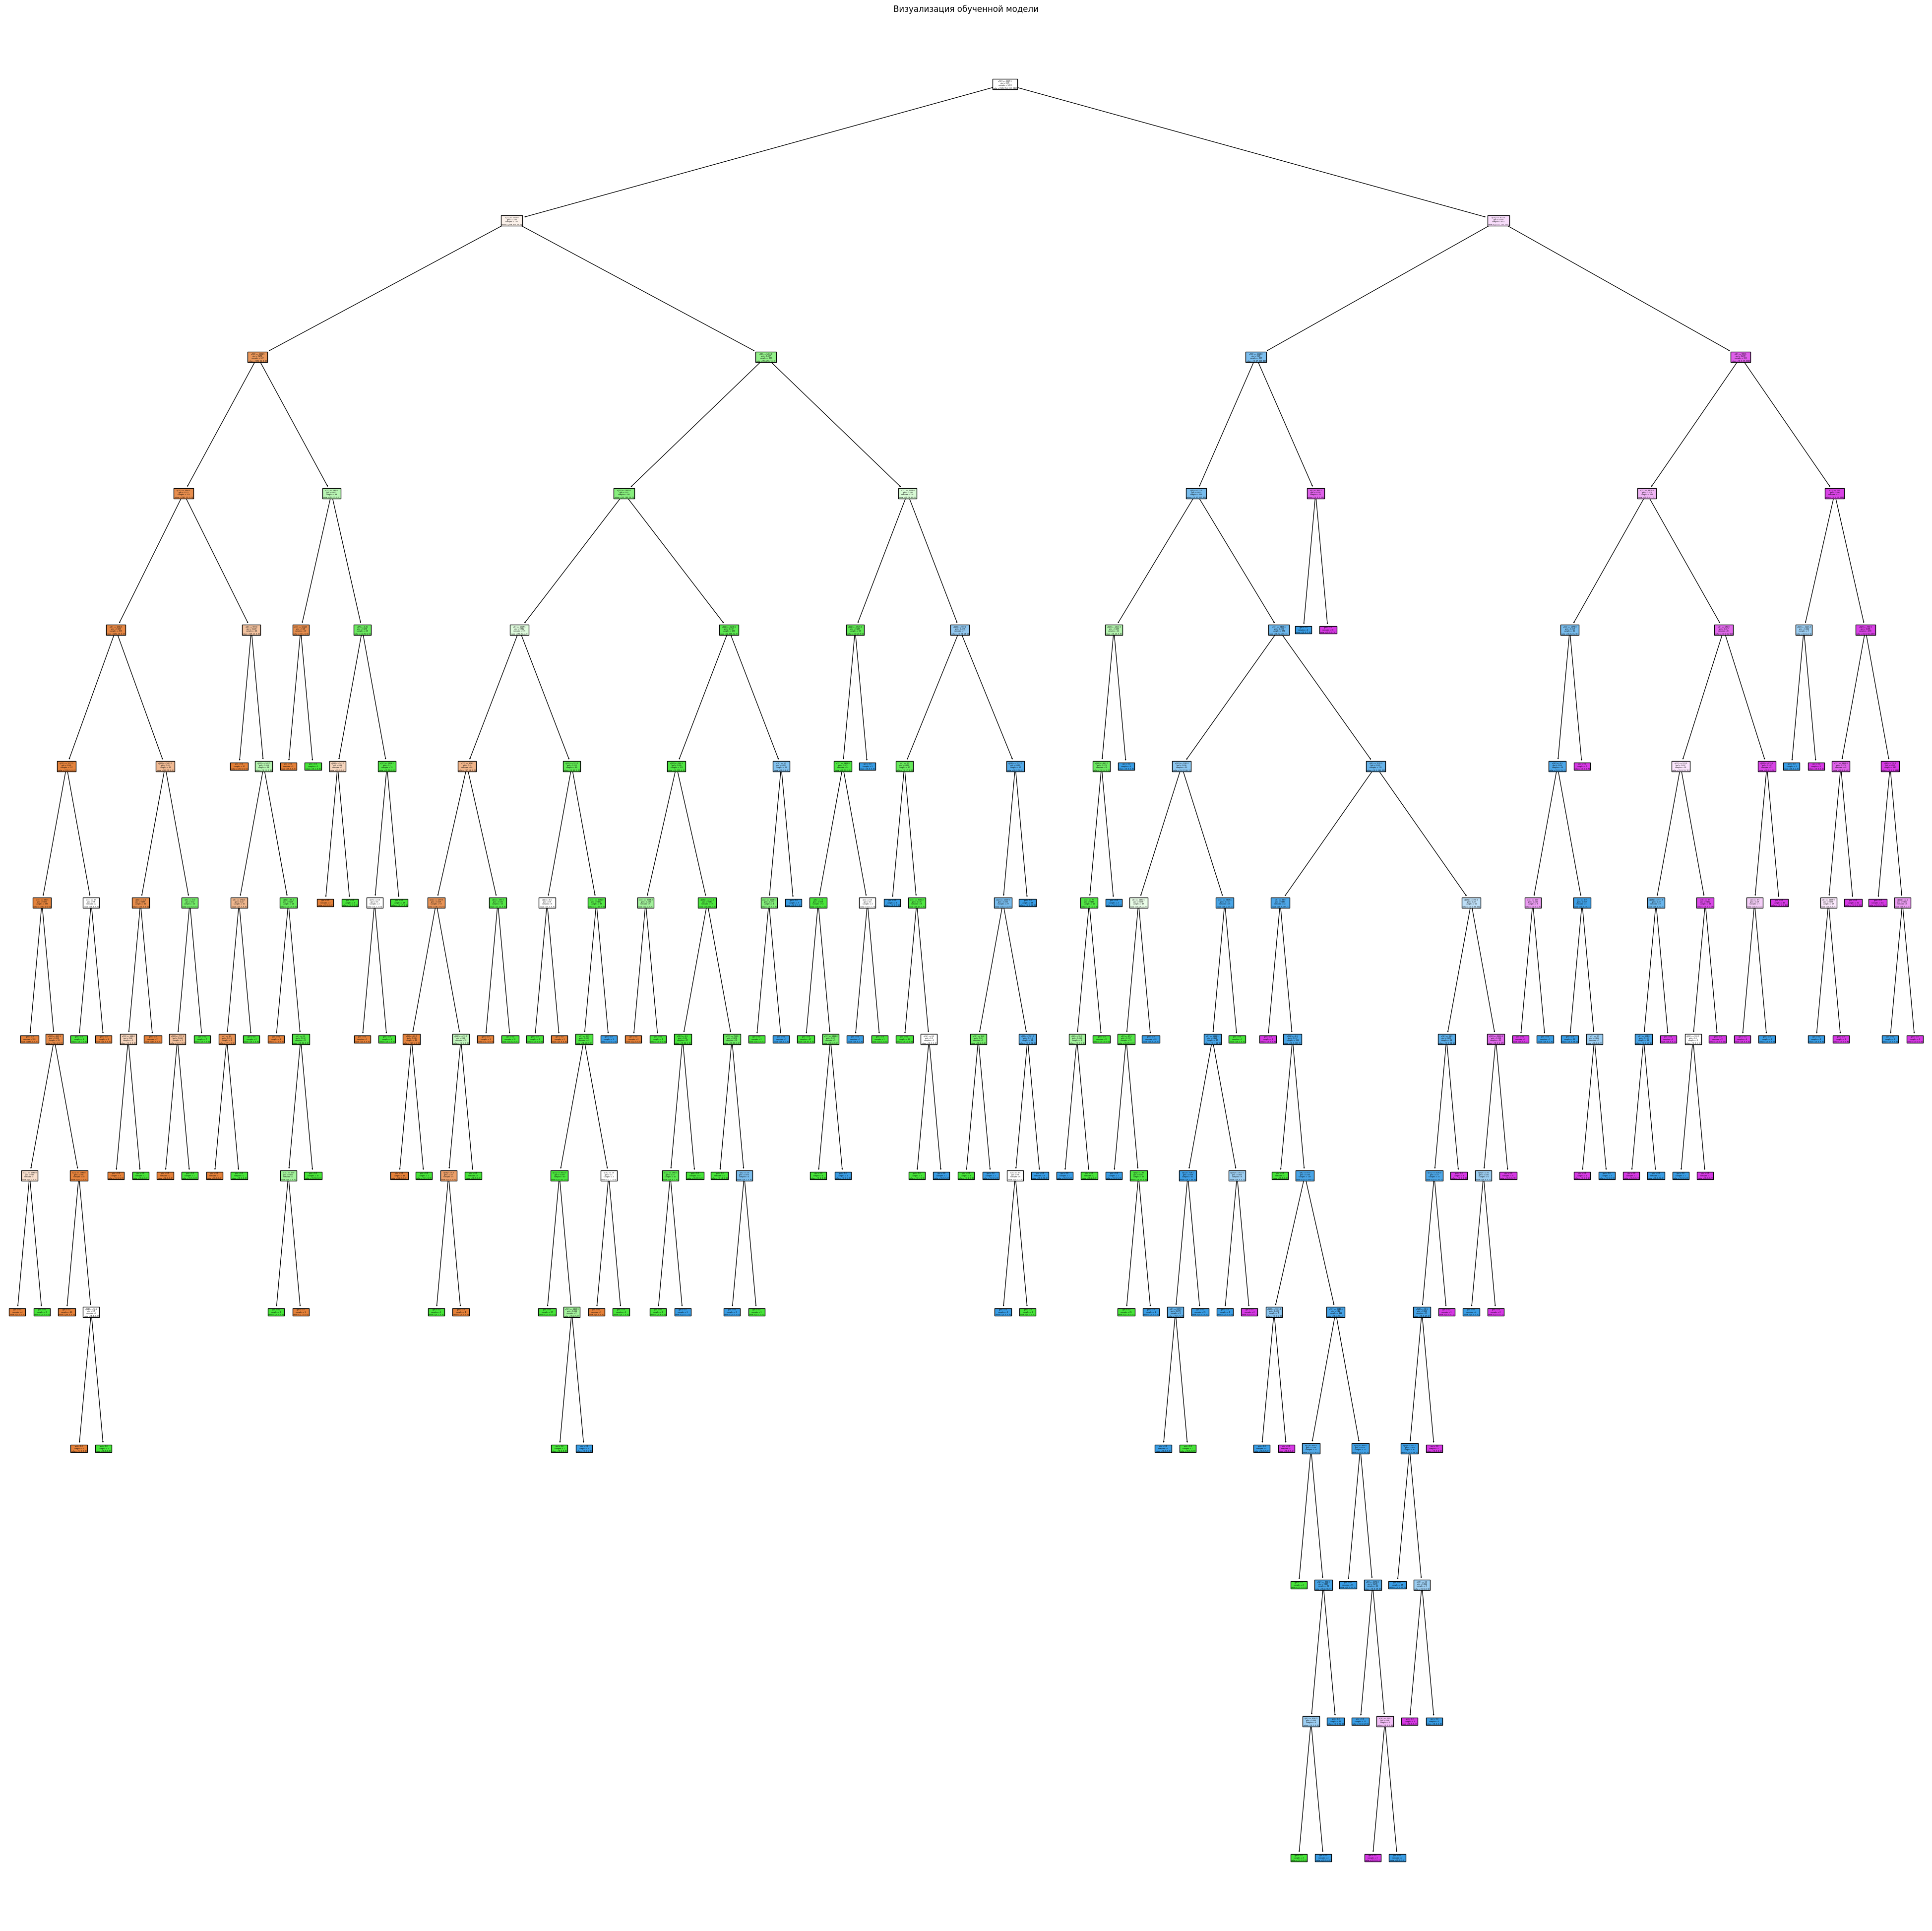

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (50,50))
plot_tree(dt, filled = True)
plt.title("Визуализация обученной модели")
plt.show()#построить тепловую карту, сделать матрицу спутанности, рисунок дерева с 4 глубиной

7) Нормализуйте данные и обучите дерево на них. Как нормализация повлияла на результаты предсказания?

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMax_Scaler = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_MinMax_Scaler = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_new = DecisionTreeClassifier()
dt_new.fit(X_train_MinMax_Scaler, y_train)
dt_new.score(X_test_MinMax_Scaler, y_test)

0.81

In [ ]:
from sklearn.metrics import classification_report
y_pred = dt_new.predict(X_train_MinMax_Scaler)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       354
           2       1.00      1.00      1.00       352
           3       1.00      1.00      1.00       345

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



In [ ]:
from sklearn.metrics import classification_report
y_pred = dt_new.predict(X_test_MinMax_Scaler)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       151
           1       0.73      0.79      0.76       146
           2       0.74      0.71      0.73       148
           3       0.86      0.86      0.86       155

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



8) Подберите значения гиперпараметров с помощью RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
# Задание диапазона значений гиперпараметров для перебора
param_dist = {
    'max_depth': [3, None],
    'min_samples_split': range(2, 100),
    'min_samples_leaf': range(1, 100)
}

# Создание модели RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions = param_dist, n_iter=100, cv=5, scoring='accuracy', return_train_score=False)
#Обучение модели
grid_search = random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)

{'min_samples_split': 22, 'min_samples_leaf': 10, 'max_depth': None}
0.837857142857143


9) Сделайте выводы об использовании (плюсах и минусах) деревьев решений для классификации в целом и применительно к рассмотренному набору данных.

Плюсы: простота интерпритации, возможность работать с пропусками, возможность обработки числовых и категориальных признаков

Минусы: высокий риск переобучения, неустойчивасть к изменению данных, сложность в работе с несбалансированными классами.

10) Примените ансамблевые методы на основе деревьев решений:

10.1) случайный лес RandomForestClassifier,

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_train, price_range, test_size = 0.3, random_state = 42)

sel = RandomForestClassifier(n_estimators = 100)
sel.fit(X_train, y_train)
#Оценка важности признаков
importances = sel.feature_importances_
#Вывод наиболее важных признаков
important_features = X_train.columns[importances > 0.05]
print(important_features)#написать результаты и коэфы важности

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')


10.2) AdaBoostClassifier,

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_train, price_range, test_size = 0.3, random_state = 42)

adab = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2, algorithm= 'SAMME.R', random_state=0)
adab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_pred = adab.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average = 'micro'))
print("Precision:", precision_score(y_test, y_pred, average = 'micro'))

Accuracy: 0.435
Recall: 0.435
Precision: 0.435


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.2, 0.5, 1.0]}
grid_search = GridSearchCV(adab, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 1.0, 'n_estimators': 150}


In [ ]:
adab_best = AdaBoostClassifier(n_estimators = grid_search.best_params_['n_estimators'], learning_rate = grid_search.best_params_['learning_rate'], algorithm= 'SAMME.R', random_state=0)
adab_best.fit(X_train, y_train)
y_pred = adab_best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average = 'micro'))
print("Precision:", precision_score(y_test, y_pred, average = 'micro'))


Accuracy: 0.7266666666666667
Recall: 0.7266666666666667
Precision: 0.7266666666666667


10.3) GradientBoostingClassifier (HistGradientBoostingClassifier),

In [ ]:
# Градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_train, price_range, test_size = 0.3, random_state = 42)

gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average = 'micro'))
print("Precision:", precision_score(y_test, y_pred, average = 'micro'))

Accuracy: 0.8866666666666667
Recall: 0.8866666666666667
Precision: 0.8866666666666667


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50], 'max_depth': [3]}
grid_search = GridSearchCV(gb, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'n_estimators': 50}


In [ ]:
gb_best = GradientBoostingClassifier(n_estimators = grid_search.best_params_['n_estimators'], max_depth = grid_search.best_params_['max_depth'], learning_rate = 0.1, random_state=42)
gb_best.fit(X_train, y_train)
y_pred = gb_best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average = 'micro'))
print("Precision:", precision_score(y_test, y_pred, average = 'micro'))

Accuracy: 0.86
Recall: 0.86
Precision: 0.86


10.4) свой вариант построения, обучения и оценки работы ансамбля.

In [ ]:
# Будем использовать VotingClassifier.
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

tree_clf = DecisionTreeClassifier()
forest_clf = RandomForestClassifier()
voiting_clf = VotingClassifier(estimators = [('tree', tree_clf), ('forest', forest_clf)], voting = 'hard')
# Жёсткое голосование это тип голосования, при котором метка класса для конкретной выборки - это метка класса, которая
# Представляется большинством меток классов, предсказанных каждым отдельным классификатором.

X_train, X_test, y_train, y_test = train_test_split(data_train, price_range, test_size = 0.3, random_state = 42)

voiting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('forest', RandomForestClassifier())])

In [ ]:
y_pred = voiting_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average = 'micro'))
print('Precision:', precision_score(y_test, y_pred, average = 'micro'))

Accuracy: 0.855
Recall: 0.855
Precision: 0.855


 11) Подготовьте также модели классификации методом k-ближайших соседей и методом опорных векторов (sklearn.svm.SVC). Примените ансамбль VotingClassifier.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

clf = KNeighborsClassifier()
svc = SVC(kernel = 'rbf', probability = True)
tree_clf = DecisionTreeClassifier()

voiting_clf = VotingClassifier(estimators = [('tree', tree_clf), ('knn', clf),  ('svc', svc)], voting = 'soft' )
#Мягкое голосование возвращает метку класса как argmax суммы прогнозирумых вероятностей.
#Накладываются веса на каждый классификатор в результате чего прогнозируемые вероятности классов для каждого классификатора
#собираются, умножаются на вес классификатора и усредняются. Окончательная метка класса затем получается из метки класса с наибольшей вероятностью.
X_train, X_test, y_train, y_test = train_test_split(data_train, price_range, test_size = 0.3, random_state = 42)

voiting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [ ]:
y_pred = voiting_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average = 'micro'))
print('Precision:', precision_score(y_test, y_pred, average = 'micro'))

Accuracy: 0.9133333333333333
Recall: 0.9133333333333333
Precision: 0.9133333333333333
